# DEFINICIÓN DE PARÁMETROS

In [1]:
#######################################################################################################################

# Ruta hacia los CSV del dataset
train_file_relative = './data/700Train.csv'
validation_file_relative = './data/700Validation.csv'
test_file_relative = './data/700Test.csv'

# Ruta al directorio de imágenes con máscara aplicada
masked_dir_relative = '../local/output_masked'
edited_dir_relative = '../local/output_edited'

model_dir_relative = "./models"

# Ruta relativa hacia la librería ai4eutils
ai4eutils_relative = "./repos/ai4eutils"

# Ruta relativa hacia la librería CameraTraps
CameraTraps_relative = "./repos/CameraTraps"

#######################################################################################################################

# DEFINICIÓN PARÁMETROS CNN

In [3]:
#######################################################################################################################

IMG_HEIGHT = IMG_WEIGHT = 500
EPOCHS = 50
BATCH_SIZE = 16

#######################################################################################################################

In [4]:
import os
import platform

import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow import keras

from modules.dataset_utils import DatasetUtils

home = os.path.expanduser("~")

ai4utils = os.path.abspath(ai4eutils_relative)
CameraTraps = os.path.abspath(CameraTraps_relative)
train_file = os.path.abspath(train_file_relative)
validation_file = os.path.abspath(validation_file_relative)
test_file = os.path.abspath(test_file_relative)
masked_dir = os.path.abspath(masked_dir_relative)
edited_dir = os.path.abspath(edited_dir_relative)
model_dir = os.path.abspath(model_dir_relative)

try:
    os.environ['PYTHONPATH']
except KeyError:
    os.environ['PYTHONPATH'] = ""
if platform.system() == 'Windows':
    os.environ['PYTHONPATH'] += (";" + ai4utils)
    os.environ['PYTHONPATH'] += (";" + CameraTraps)
else:
    os.environ['PYTHONPATH'] += (":" + ai4utils)
    os.environ['PYTHONPATH'] += (":" + CameraTraps)

print('==============================================================================================================')
print('PYTHONPATH: ' + os.environ['PYTHONPATH'])
print('')
print('ai4eutils PATH: ' + '\t\t' + ai4utils)
print('CameraTraps PATH: ' + '\t\t' + CameraTraps)
print('Train CSV PATH: ' + '\t\t' + train_file)
print('Validation CSV PATH: ' + '\t' + validation_file)
print('Test CSV PATH: ' + '\t\t\t' + test_file)
print('masked PATH: ' + '\t\t\t' + masked_dir)
print('edited PATH: ' + '\t\t\t' + edited_dir)
print('models PATH: ' + '\t\t\t' + model_dir)
print('==============================================================================================================')


TensorFlow version: 2.10.0
Is GPU available? tf.test.is_gpu_available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

PYTHONPATH: /Users/carlos/WORKSPACE/TFG-DeteccionFototrampeo:/Users/carlos/WORKSPACE/TFG-DeteccionFototrampeo/repos/ai4eutils:/Users/carlos/WORKSPACE/TFG-DeteccionFototrampeo/repos/CameraTraps

ai4eutils PATH: 		/Users/carlos/WORKSPACE/TFG-DeteccionFototrampeo/repos/ai4eutils
CameraTraps PATH: 		/Users/carlos/WORKSPACE/TFG-DeteccionFototrampeo/repos/CameraTraps
Train CSV PATH: 		/Users/carlos/WORKSPACE/TFG-DeteccionFototrampeo/data/700Train.csv
Validation CSV PATH: 	/Users/carlos/WORKSPACE/TFG-DeteccionFototrampeo/data/700Validation.csv
Test CSV PATH: 			/Users/carlos/WORKSPACE/TFG-DeteccionFototrampeo/data/700Test.csv
masked PATH: 			/Users/carlos/WORKSPACE/local/output_masked
edited PATH: 			/Users/carlos/WORKSPACE/local/output_edited
models PATH: 			/Users/carlos/WORKSPACE/TFG-DeteccionFototrampeo/models


# ALEXNET original architecture with image size 224x224

In [4]:
'''
# =====================================================================================================================
# Dataset with masked image
file_path, labels = DatasetUtils.load_dataset(train_file, masked_dir)
TRAIN_BUFFER = len(labels)
train_dataset_masked = tf.data.Dataset.from_tensor_slices((file_path, labels))
train_dataset_masked = train_dataset_masked.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_224).shuffle(TRAIN_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(validation_file, masked_dir)
VALIDATION_BUFFER = len(labels)
validation_dataset_masked = tf.data.Dataset.from_tensor_slices((file_path, labels))
validation_dataset_masked = validation_dataset_masked.map(DatasetUtils.load_image).map(
    DatasetUtils.normalize_images).map(DatasetUtils.resize_224).shuffle(VALIDATION_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(test_file, masked_dir)
TEST_BUFFER = len(labels)
test_dataset_masked = tf.data.Dataset.from_tensor_slices((file_path, labels))
test_dataset_masked = test_dataset_masked.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_224).shuffle(TEST_BUFFER).batch(BATCH_SIZE)

# =====================================================================================================================
# Dataset with edited image
file_path, labels = DatasetUtils.load_dataset(train_file, edited_dir)
TRAIN_BUFFER = len(labels)
train_dataset_edited = tf.data.Dataset.from_tensor_slices((file_path, labels))
train_dataset_edited = train_dataset_edited.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_224).shuffle(TRAIN_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(validation_file, edited_dir)
VALIDATION_BUFFER = len(labels)
validation_dataset_edited = tf.data.Dataset.from_tensor_slices((file_path, labels))
validation_dataset_edited = validation_dataset_edited.map(DatasetUtils.load_image).map(
    DatasetUtils.normalize_images).map(DatasetUtils.resize_224).shuffle(VALIDATION_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(test_file, edited_dir)
TEST_BUFFER = len(labels)
test_dataset_edited = tf.data.Dataset.from_tensor_slices((file_path, labels))
test_dataset_edited = test_dataset_edited.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_224).shuffle(TEST_BUFFER).batch(BATCH_SIZE)
'''

'\n# =====================================================================================================================\n# Dataset with masked image\nfile_path, labels = DatasetUtils.load_dataset(train_file, masked_dir)\nTRAIN_BUFFER = len(labels)\ntrain_dataset_masked = tf.data.Dataset.from_tensor_slices((file_path, labels))\ntrain_dataset_masked = train_dataset_masked.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(\n    DatasetUtils.resize_224).shuffle(TRAIN_BUFFER).batch(BATCH_SIZE)\n\nfile_path, labels = DatasetUtils.load_dataset(validation_file, masked_dir)\nVALIDATION_BUFFER = len(labels)\nvalidation_dataset_masked = tf.data.Dataset.from_tensor_slices((file_path, labels))\nvalidation_dataset_masked = validation_dataset_masked.map(DatasetUtils.load_image).map(\n    DatasetUtils.normalize_images).map(DatasetUtils.resize_224).shuffle(VALIDATION_BUFFER).batch(BATCH_SIZE)\n\nfile_path, labels = DatasetUtils.load_dataset(test_file, masked_dir)\nTEST_BUFFER = len

In [5]:
'''AlexNet_OG_224_masked = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    keras.layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),
    keras.layers.Flatten(),

    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(1, activation='sigmoid')
])
AlexNet_OG_224_masked.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                              loss=[keras.losses.BinaryCrossentropy()],
                              metrics=['accuracy'])

AlexNet_OG_224_edited = tf.keras.models.clone_model(AlexNet_OG_224_masked, input_tensors=None, clone_function=None)
AlexNet_OG_224_edited.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                              loss=[keras.losses.BinaryCrossentropy()],
                              metrics=['accuracy'])'''

'AlexNet_OG_224_masked = keras.models.Sequential([\n    keras.layers.Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation=\'relu\', input_shape=(224, 224, 3)),\n    keras.layers.BatchNormalization(),\n    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),\n\n    keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation=\'relu\', padding="same"),\n    keras.layers.BatchNormalization(),\n    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),\n\n    keras.layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation=\'relu\', padding="same"),\n    keras.layers.BatchNormalization(),\n\n    keras.layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation=\'relu\', padding="same"),\n    keras.layers.BatchNormalization(),\n\n    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=\'relu\', padding="same"),\n    keras.layers.BatchNormalization(),\n    keras.layers.MaxPool2D(pool_size=(3, 3

In [6]:
'''hist = AlexNet_OG_224_masked.fit(train_dataset_masked, epochs=EPOCHS, validation_data=validation_dataset_masked,
                                 batch_size=BATCH_SIZE)

results = AlexNet_OG_224_masked.evaluate(test_dataset_masked, verbose=1)

fig = plt.figure(figsize=(15,10))
fig.suptitle('AlexNet original 224x224 masked')

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(hist.history['loss'], color='blue', label='loss', )
ax1.plot(hist.history['val_loss'], color='green', label='val_loss')
ax1.legend(loc="upper right")
ax2.plot(hist.history['accuracy'], color='orange', label='accuracy')
ax2.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
ax2.legend(loc="lower right")
plt.show()'''

'hist = AlexNet_OG_224_masked.fit(train_dataset_masked, epochs=EPOCHS, validation_data=validation_dataset_masked,\n                                 batch_size=BATCH_SIZE)\n\nresults = AlexNet_OG_224_masked.evaluate(test_dataset_masked, verbose=1)\n\nfig = plt.figure(figsize=(15,10))\nfig.suptitle(\'AlexNet original 224x224 masked\')\n\nax1 = fig.add_subplot(2,1,1)\nax2 = fig.add_subplot(2,1,2)\n\nax1.plot(hist.history[\'loss\'], color=\'blue\', label=\'loss\', )\nax1.plot(hist.history[\'val_loss\'], color=\'green\', label=\'val_loss\')\nax1.legend(loc="upper right")\nax2.plot(hist.history[\'accuracy\'], color=\'orange\', label=\'accuracy\')\nax2.plot(hist.history[\'val_accuracy\'], color=\'red\', label=\'val_accuracy\')\nax2.legend(loc="lower right")\nplt.show()'

In [7]:
'''hist = AlexNet_OG_224_edited.fit(train_dataset_edited, epochs=EPOCHS, validation_data=validation_dataset_edited,
                                 batch_size=BATCH_SIZE)

results = AlexNet_OG_224_edited.evaluate(test_dataset_edited, verbose=1)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

fig.suptitle('AlexNet original 224x224 edited')
ax1.plot(hist.history['loss'], color='blue', label='loss', )
ax1.plot(hist.history['val_loss'], color='green', label='val_loss')
ax2.plot(hist.history['accuracy'], color='orange', label='accuracy')
ax2.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')

plt.legend(loc="upper left")
plt.show()'''

'hist = AlexNet_OG_224_edited.fit(train_dataset_edited, epochs=EPOCHS, validation_data=validation_dataset_edited,\n                                 batch_size=BATCH_SIZE)\n\nresults = AlexNet_OG_224_edited.evaluate(test_dataset_edited, verbose=1)\n\nfig = plt.figure(figsize=(15,5))\nax1 = fig.add_subplot(121)\nax2 = fig.add_subplot(122)\n\nfig.suptitle(\'AlexNet original 224x224 edited\')\nax1.plot(hist.history[\'loss\'], color=\'blue\', label=\'loss\', )\nax1.plot(hist.history[\'val_loss\'], color=\'green\', label=\'val_loss\')\nax2.plot(hist.history[\'accuracy\'], color=\'orange\', label=\'accuracy\')\nax2.plot(hist.history[\'val_accuracy\'], color=\'red\', label=\'val_accuracy\')\n\nplt.legend(loc="upper left")\nplt.show()'

# ALEXNET original architecture with image size 448x448

In [8]:
'''
# =====================================================================================================================
# Dataset with masked image
file_path, labels = DatasetUtils.load_dataset(train_file, masked_dir)
TRAIN_BUFFER = len(labels)
train_dataset_masked = tf.data.Dataset.from_tensor_slices((file_path, labels))
train_dataset_masked = train_dataset_masked.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_448).shuffle(TRAIN_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(validation_file, masked_dir)
VALIDATION_BUFFER = len(labels)
validation_dataset_masked = tf.data.Dataset.from_tensor_slices((file_path, labels))
validation_dataset_masked = validation_dataset_masked.map(DatasetUtils.load_image).map(
    DatasetUtils.normalize_images).map(DatasetUtils.resize_448).shuffle(VALIDATION_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(test_file, masked_dir)
TEST_BUFFER = len(labels)
test_dataset_masked = tf.data.Dataset.from_tensor_slices((file_path, labels))
test_dataset_masked = test_dataset_masked.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_448).shuffle(TEST_BUFFER).batch(BATCH_SIZE)

# =====================================================================================================================
# Dataset with edited image
file_path, labels = DatasetUtils.load_dataset(train_file, edited_dir)
TRAIN_BUFFER = len(labels)
train_dataset_edited = tf.data.Dataset.from_tensor_slices((file_path, labels))
train_dataset_edited = train_dataset_edited.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_448).shuffle(TRAIN_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(validation_file, edited_dir)
VALIDATION_BUFFER = len(labels)
validation_dataset_edited = tf.data.Dataset.from_tensor_slices((file_path, labels))
validation_dataset_edited = validation_dataset_edited.map(DatasetUtils.load_image).map(
    DatasetUtils.normalize_images).map(DatasetUtils.resize_448).shuffle(VALIDATION_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(test_file, edited_dir)
TEST_BUFFER = len(labels)
test_dataset_edited = tf.data.Dataset.from_tensor_slices((file_path, labels))
test_dataset_edited = test_dataset_edited.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_448).shuffle(TEST_BUFFER).batch(BATCH_SIZE)

# =====================================================================================================================
'''

'\n# =====================================================================================================================\n# Dataset with masked image\nfile_path, labels = DatasetUtils.load_dataset(train_file, masked_dir)\nTRAIN_BUFFER = len(labels)\ntrain_dataset_masked = tf.data.Dataset.from_tensor_slices((file_path, labels))\ntrain_dataset_masked = train_dataset_masked.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(\n    DatasetUtils.resize_448).shuffle(TRAIN_BUFFER).batch(BATCH_SIZE)\n\nfile_path, labels = DatasetUtils.load_dataset(validation_file, masked_dir)\nVALIDATION_BUFFER = len(labels)\nvalidation_dataset_masked = tf.data.Dataset.from_tensor_slices((file_path, labels))\nvalidation_dataset_masked = validation_dataset_masked.map(DatasetUtils.load_image).map(\n    DatasetUtils.normalize_images).map(DatasetUtils.resize_448).shuffle(VALIDATION_BUFFER).batch(BATCH_SIZE)\n\nfile_path, labels = DatasetUtils.load_dataset(test_file, masked_dir)\nTEST_BUFFER = len

In [9]:
'''AlexNet_OG_448_masked = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(448, 448, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    keras.layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),
    keras.layers.Flatten(),

    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(1, activation='sigmoid')
])
AlexNet_OG_448_masked.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                              loss=[keras.losses.BinaryCrossentropy()],
                              metrics=['accuracy'])

AlexNet_OG_448_edited = tf.keras.models.clone_model(AlexNet_OG_448_masked, input_tensors=None, clone_function=None)
AlexNet_OG_448_edited.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                              loss=[keras.losses.BinaryCrossentropy()],
                              metrics=['accuracy'])'''

'AlexNet_OG_448_masked = keras.models.Sequential([\n    keras.layers.Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation=\'relu\', input_shape=(448, 448, 3)),\n    keras.layers.BatchNormalization(),\n    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),\n\n    keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation=\'relu\', padding="same"),\n    keras.layers.BatchNormalization(),\n    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),\n\n    keras.layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation=\'relu\', padding="same"),\n    keras.layers.BatchNormalization(),\n\n    keras.layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation=\'relu\', padding="same"),\n    keras.layers.BatchNormalization(),\n\n    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=\'relu\', padding="same"),\n    keras.layers.BatchNormalization(),\n    keras.layers.MaxPool2D(pool_size=(3, 3

In [10]:
'''hist = AlexNet_OG_448_masked.fit(train_dataset_masked, epochs=EPOCHS, validation_data=validation_dataset_masked,
                                 batch_size=BATCH_SIZE)

results = AlexNet_OG_448_masked.evaluate(test_dataset_masked, verbose=1)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

fig.suptitle('AlexNet original 448x448 masked')
ax1.plot(hist.history['loss'], color='blue', label='loss', )
ax1.plot(hist.history['val_loss'], color='green', label='val_loss')
ax2.plot(hist.history['accuracy'], color='orange', label='accuracy')
ax2.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')

plt.legend(loc="upper left")
plt.show()'''

'hist = AlexNet_OG_448_masked.fit(train_dataset_masked, epochs=EPOCHS, validation_data=validation_dataset_masked,\n                                 batch_size=BATCH_SIZE)\n\nresults = AlexNet_OG_448_masked.evaluate(test_dataset_masked, verbose=1)\n\nfig = plt.figure(figsize=(15,5))\nax1 = fig.add_subplot(121)\nax2 = fig.add_subplot(122)\n\nfig.suptitle(\'AlexNet original 448x448 masked\')\nax1.plot(hist.history[\'loss\'], color=\'blue\', label=\'loss\', )\nax1.plot(hist.history[\'val_loss\'], color=\'green\', label=\'val_loss\')\nax2.plot(hist.history[\'accuracy\'], color=\'orange\', label=\'accuracy\')\nax2.plot(hist.history[\'val_accuracy\'], color=\'red\', label=\'val_accuracy\')\n\nplt.legend(loc="upper left")\nplt.show()'

In [11]:
'''hist = AlexNet_OG_448_edited.fit(train_dataset_edited, epochs=EPOCHS, validation_data=validation_dataset_edited,
                                 batch_size=BATCH_SIZE)

results = AlexNet_OG_448_edited.evaluate(test_dataset_masked, verbose=1)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

fig.suptitle('AlexNet original 448x448 edited')
ax1.plot(hist.history['loss'], color='blue', label='loss', )
ax1.plot(hist.history['val_loss'], color='green', label='val_loss')
ax2.plot(hist.history['accuracy'], color='orange', label='accuracy')
ax2.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')

plt.legend(loc="upper left")
plt.show()
'''

'hist = AlexNet_OG_448_edited.fit(train_dataset_edited, epochs=EPOCHS, validation_data=validation_dataset_edited,\n                                 batch_size=BATCH_SIZE)\n\nresults = AlexNet_OG_448_edited.evaluate(test_dataset_masked, verbose=1)\n\nfig = plt.figure(figsize=(15,5))\nax1 = fig.add_subplot(121)\nax2 = fig.add_subplot(122)\n\nfig.suptitle(\'AlexNet original 448x448 edited\')\nax1.plot(hist.history[\'loss\'], color=\'blue\', label=\'loss\', )\nax1.plot(hist.history[\'val_loss\'], color=\'green\', label=\'val_loss\')\nax2.plot(hist.history[\'accuracy\'], color=\'orange\', label=\'accuracy\')\nax2.plot(hist.history[\'val_accuracy\'], color=\'red\', label=\'val_accuracy\')\n\nplt.legend(loc="upper left")\nplt.show()\n'

# ALEXNET modification architecture with image size 224x224

In [12]:
# =====================================================================================================================
# Dataset with masked image
file_path, labels = DatasetUtils.load_dataset(train_file, masked_dir)
TRAIN_BUFFER = len(labels)
train_dataset_masked = tf.data.Dataset.from_tensor_slices((file_path, labels))
train_dataset_masked = train_dataset_masked.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_224).shuffle(TRAIN_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(validation_file, masked_dir)
VALIDATION_BUFFER = len(labels)
validation_dataset_masked = tf.data.Dataset.from_tensor_slices((file_path, labels))
validation_dataset_masked = validation_dataset_masked.map(DatasetUtils.load_image).map(
    DatasetUtils.normalize_images).map(DatasetUtils.resize_224).shuffle(VALIDATION_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(test_file, masked_dir)
TEST_BUFFER = len(labels)
test_dataset_masked = tf.data.Dataset.from_tensor_slices((file_path, labels))
test_dataset_masked = test_dataset_masked.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_224).shuffle(TEST_BUFFER).batch(BATCH_SIZE)

# =====================================================================================================================
# Dataset with edited image
file_path, labels = DatasetUtils.load_dataset(train_file, edited_dir)
TRAIN_BUFFER = len(labels)
train_dataset_edited = tf.data.Dataset.from_tensor_slices((file_path, labels))
train_dataset_edited = train_dataset_edited.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_224).shuffle(TRAIN_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(validation_file, edited_dir)
VALIDATION_BUFFER = len(labels)
validation_dataset_edited = tf.data.Dataset.from_tensor_slices((file_path, labels))
validation_dataset_edited = validation_dataset_edited.map(DatasetUtils.load_image).map(
    DatasetUtils.normalize_images).map(DatasetUtils.resize_224).shuffle(VALIDATION_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(test_file, edited_dir)
TEST_BUFFER = len(labels)
test_dataset_edited = tf.data.Dataset.from_tensor_slices((file_path, labels))
test_dataset_edited = test_dataset_edited.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_224).shuffle(TEST_BUFFER).batch(BATCH_SIZE)

# =====================================================================================================================

Metal device set to: Apple M1


2022-10-13 19:41:36.564339: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-13 19:41:36.564445: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
AlexNet_MOD_224_masked = keras.models.Sequential([
    keras.layers.Conv2D(filters=48, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    keras.layers.Conv2D(filters=128, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    keras.layers.Conv2D(filters=192, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=192, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),
    keras.layers.Flatten(),

    keras.layers.Dense(2048, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(2048, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(1, activation='sigmoid')
])
AlexNet_MOD_224_masked.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                               loss=[keras.losses.BinaryCrossentropy()],
                               metrics=['accuracy'])

AlexNet_MOD_224_edited = tf.keras.models.clone_model(AlexNet_MOD_224_masked, input_tensors=None, clone_function=None)
AlexNet_MOD_224_edited.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                               loss=[keras.losses.BinaryCrossentropy()],
                               metrics=['accuracy'])

2022-10-16 19:03:26.118248: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-16 19:03:26.119266: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


In [6]:
AlexNet_MOD_224_edited.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 48)        17472     
                                                                 
 batch_normalization (BatchN  (None, 54, 54, 48)       192       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 48)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 128)       153728    
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 128)      512       
 hNormalization)                                                 
                                                        

Epoch 1/50


2022-10-13 19:41:37.413947: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-13 19:41:37.414395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - ETA: 0s - loss: 0.7203 - accuracy: 0.8455

2022-10-13 19:41:46.160380: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - 10s 71ms/step - loss: 0.7203 - accuracy: 0.8455 - val_loss: 1.2403 - val_accuracy: 0.3397
Epoch 2/50
91/91 [==============================] - 10s 67ms/step - loss: 0.5128 - accuracy: 0.8876 - val_loss: 1.1008 - val_accuracy: 0.3397
Epoch 3/50
91/91 [==============================] - 9s 66ms/step - loss: 0.4533 - accuracy: 0.8883 - val_loss: 0.6528 - val_accuracy: 0.9263
Epoch 4/50
91/91 [==============================] - 10s 69ms/step - loss: 0.3438 - accuracy: 0.8966 - val_loss: 0.8315 - val_accuracy: 0.6603
Epoch 5/50
91/91 [==============================] - 10s 65ms/step - loss: 0.2854 - accuracy: 0.9062 - val_loss: 0.6612 - val_accuracy: 0.6603
Epoch 6/50
91/91 [==============================] - 9s 65ms/step - loss: 0.2629 - accuracy: 0.9152 - val_loss: 1.1063 - val_accuracy: 0.6603
Epoch 7/50
91/91 [==============================] - 9s 64ms/step - loss: 0.2677 - accuracy: 0.9200 - val_loss: 0.6787 - val_accuracy: 0.6603
Epoch 8/50
91/91 [==

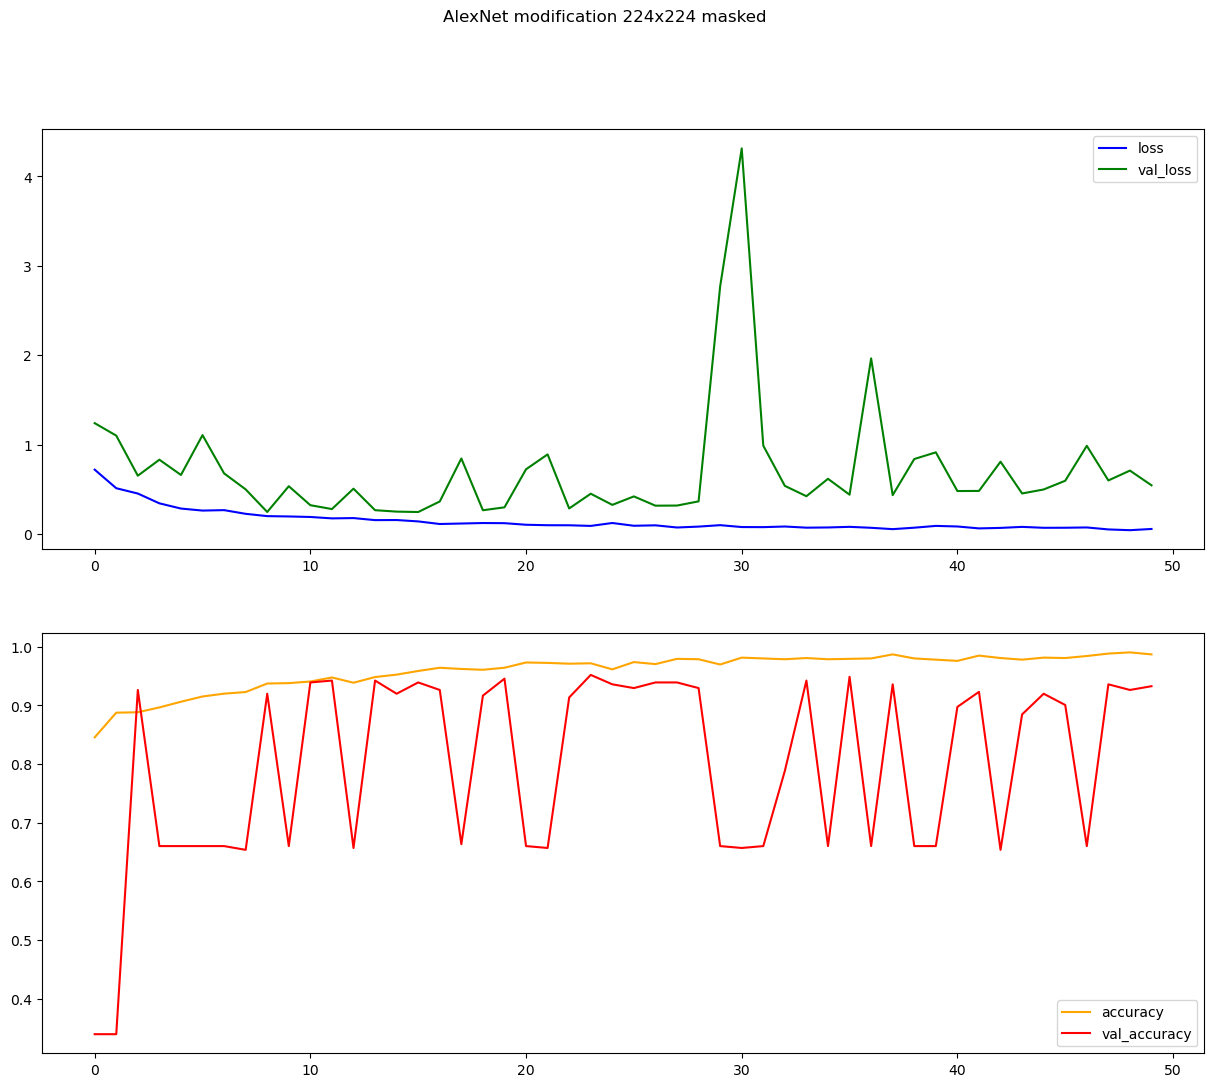

In [14]:
hist = AlexNet_MOD_224_masked.fit(train_dataset_masked, epochs=EPOCHS, validation_data=validation_dataset_masked,
                                  batch_size=BATCH_SIZE)

results = AlexNet_MOD_224_masked.evaluate(test_dataset_masked, verbose=1)

fig = plt.figure(figsize=(15,12))
fig.suptitle('AlexNet modification 224x224 masked')

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(hist.history['loss'], color='blue', label='loss', )
ax1.plot(hist.history['val_loss'], color='green', label='val_loss')
ax1.legend(loc="upper right")
ax2.plot(hist.history['accuracy'], color='orange', label='accuracy')
ax2.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
ax2.legend(loc="lower right")
plt.show()

Epoch 1/50


2022-10-13 19:49:22.504908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - ETA: 0s - loss: 0.8218 - accuracy: 0.8097

2022-10-13 19:49:29.342874: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - 8s 63ms/step - loss: 0.8218 - accuracy: 0.8097 - val_loss: 0.6787 - val_accuracy: 0.6603
Epoch 2/50
91/91 [==============================] - 7s 60ms/step - loss: 0.6528 - accuracy: 0.8269 - val_loss: 0.6430 - val_accuracy: 0.6603
Epoch 3/50
91/91 [==============================] - 7s 60ms/step - loss: 0.4944 - accuracy: 0.8579 - val_loss: 0.7523 - val_accuracy: 0.6603
Epoch 4/50
91/91 [==============================] - 7s 60ms/step - loss: 0.4448 - accuracy: 0.8566 - val_loss: 0.6502 - val_accuracy: 0.7276
Epoch 5/50
91/91 [==============================] - 7s 60ms/step - loss: 0.3882 - accuracy: 0.8724 - val_loss: 0.6884 - val_accuracy: 0.4872
Epoch 6/50
91/91 [==============================] - 7s 60ms/step - loss: 0.3384 - accuracy: 0.8883 - val_loss: 0.8213 - val_accuracy: 0.6218
Epoch 7/50
91/91 [==============================] - 7s 61ms/step - loss: 0.3363 - accuracy: 0.8897 - val_loss: 0.5720 - val_accuracy: 0.6603
Epoch 8/50
91/91 [======

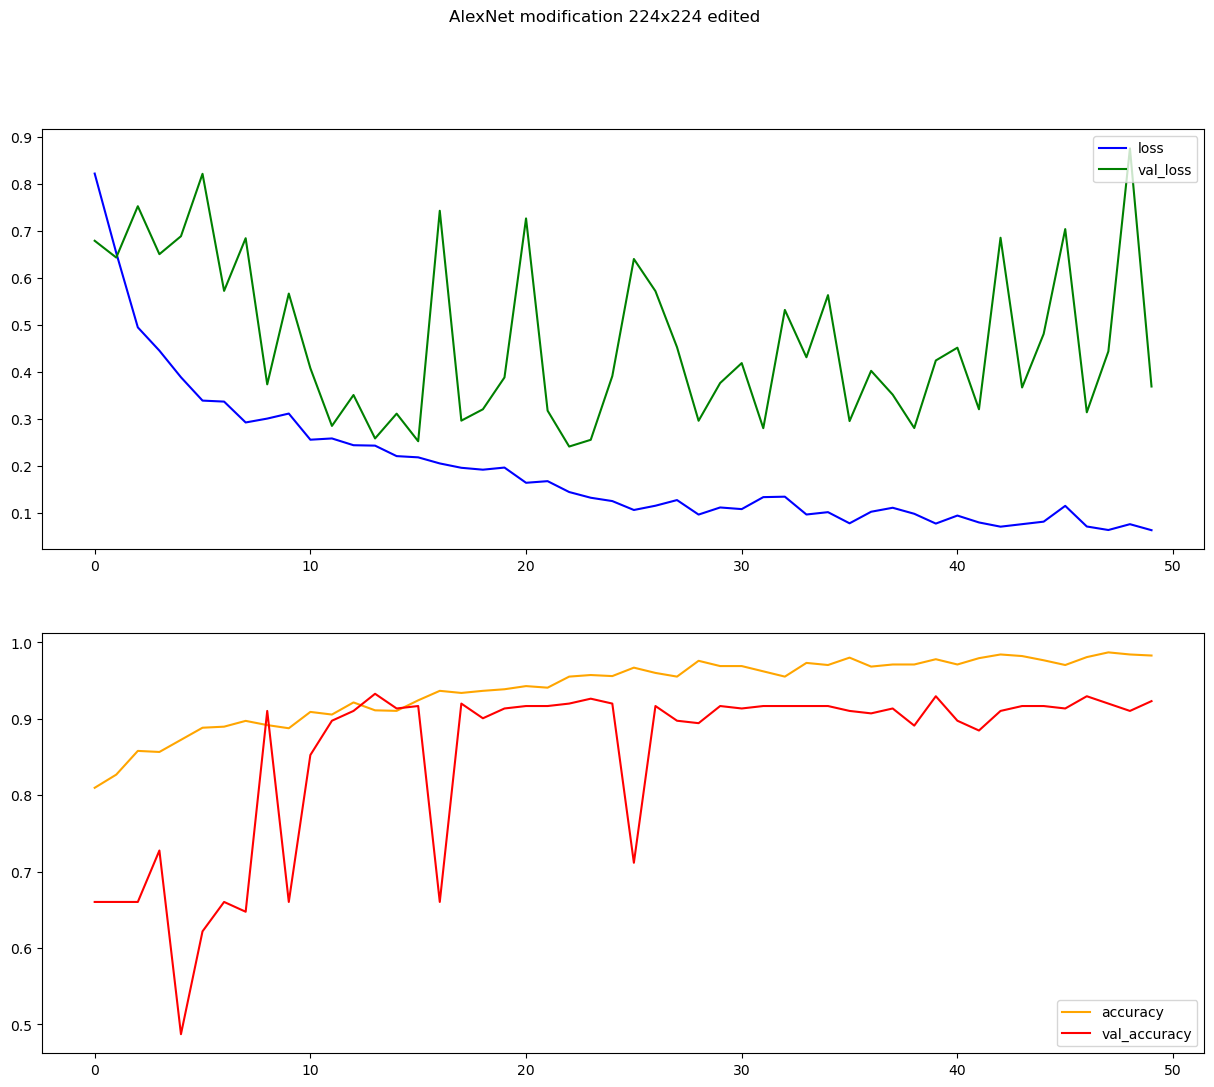

In [15]:
hist = AlexNet_MOD_224_edited.fit(train_dataset_edited, epochs=EPOCHS, validation_data=validation_dataset_edited,
                                  batch_size=BATCH_SIZE)

results = AlexNet_MOD_224_edited.evaluate(test_dataset_masked, verbose=1)

fig = plt.figure(figsize=(15,12))
fig.suptitle('AlexNet modification 224x224 edited')

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(hist.history['loss'], color='blue', label='loss', )
ax1.plot(hist.history['val_loss'], color='green', label='val_loss')
ax1.legend(loc="upper right")
ax2.plot(hist.history['accuracy'], color='orange', label='accuracy')
ax2.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
ax2.legend(loc="lower right")
plt.show()

# ALEXNET modification architecture with image size 448x448

In [16]:
# =====================================================================================================================
# Dataset with masked image
file_path, labels = DatasetUtils.load_dataset(train_file, masked_dir)
TRAIN_BUFFER = len(labels)
train_dataset_masked = tf.data.Dataset.from_tensor_slices((file_path, labels))
train_dataset_masked = train_dataset_masked.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_448).shuffle(TRAIN_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(validation_file, masked_dir)
VALIDATION_BUFFER = len(labels)
validation_dataset_masked = tf.data.Dataset.from_tensor_slices((file_path, labels))
validation_dataset_masked = validation_dataset_masked.map(DatasetUtils.load_image).map(
    DatasetUtils.normalize_images).map(DatasetUtils.resize_448).shuffle(VALIDATION_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(test_file, masked_dir)
TEST_BUFFER = len(labels)
test_dataset_masked = tf.data.Dataset.from_tensor_slices((file_path, labels))
test_dataset_masked = test_dataset_masked.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_448).shuffle(TEST_BUFFER).batch(BATCH_SIZE)

# =====================================================================================================================
# Dataset with edited image
file_path, labels = DatasetUtils.load_dataset(train_file, edited_dir)
TRAIN_BUFFER = len(labels)
train_dataset_edited = tf.data.Dataset.from_tensor_slices((file_path, labels))
train_dataset_edited = train_dataset_edited.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_448).shuffle(TRAIN_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(validation_file, edited_dir)
VALIDATION_BUFFER = len(labels)
validation_dataset_edited = tf.data.Dataset.from_tensor_slices((file_path, labels))
validation_dataset_edited = validation_dataset_edited.map(DatasetUtils.load_image).map(
    DatasetUtils.normalize_images).map(DatasetUtils.resize_448).shuffle(VALIDATION_BUFFER).batch(BATCH_SIZE)

file_path, labels = DatasetUtils.load_dataset(test_file, edited_dir)
TEST_BUFFER = len(labels)
test_dataset_edited = tf.data.Dataset.from_tensor_slices((file_path, labels))
test_dataset_edited = test_dataset_edited.map(DatasetUtils.load_image).map(DatasetUtils.normalize_images).map(
    DatasetUtils.resize_448).shuffle(TEST_BUFFER).batch(BATCH_SIZE)

# =====================================================================================================================

In [17]:
AlexNet_MOD_448_masked = keras.models.Sequential([
    keras.layers.Conv2D(filters=48, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(448, 448, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    keras.layers.Conv2D(filters=128, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    keras.layers.Conv2D(filters=192, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=192, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),
    keras.layers.Flatten(),

    keras.layers.Dense(2048, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(2048, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(1, activation='sigmoid')
])
AlexNet_MOD_448_masked.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                               loss=[keras.losses.BinaryCrossentropy()],
                               metrics=['accuracy'])

AlexNet_MOD_448_edited = tf.keras.models.clone_model(AlexNet_MOD_448_masked, input_tensors=None, clone_function=None)
AlexNet_MOD_448_edited.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                               loss=[keras.losses.BinaryCrossentropy()],
                               metrics=['accuracy'])

Epoch 1/50


2022-10-13 19:55:25.030099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - ETA: 0s - loss: 1.3067 - accuracy: 0.8407

2022-10-13 19:55:48.502967: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - 26s 227ms/step - loss: 1.3067 - accuracy: 0.8407 - val_loss: 2.0887 - val_accuracy: 0.3397
Epoch 2/50
91/91 [==============================] - 25s 224ms/step - loss: 0.8552 - accuracy: 0.8607 - val_loss: 1.8147 - val_accuracy: 0.3397
Epoch 3/50
91/91 [==============================] - 25s 223ms/step - loss: 0.6201 - accuracy: 0.8752 - val_loss: 0.8996 - val_accuracy: 0.3397
Epoch 4/50
91/91 [==============================] - 25s 221ms/step - loss: 0.4618 - accuracy: 0.8986 - val_loss: 0.7032 - val_accuracy: 0.4135
Epoch 5/50
91/91 [==============================] - 25s 222ms/step - loss: 0.4855 - accuracy: 0.8979 - val_loss: 3.3278 - val_accuracy: 0.6603
Epoch 6/50
91/91 [==============================] - 25s 222ms/step - loss: 0.3626 - accuracy: 0.9138 - val_loss: 3.3737 - val_accuracy: 0.6603
Epoch 7/50
91/91 [==============================] - 25s 224ms/step - loss: 0.3018 - accuracy: 0.9255 - val_loss: 4.6289 - val_accuracy: 0.6635
Epoch 8/50

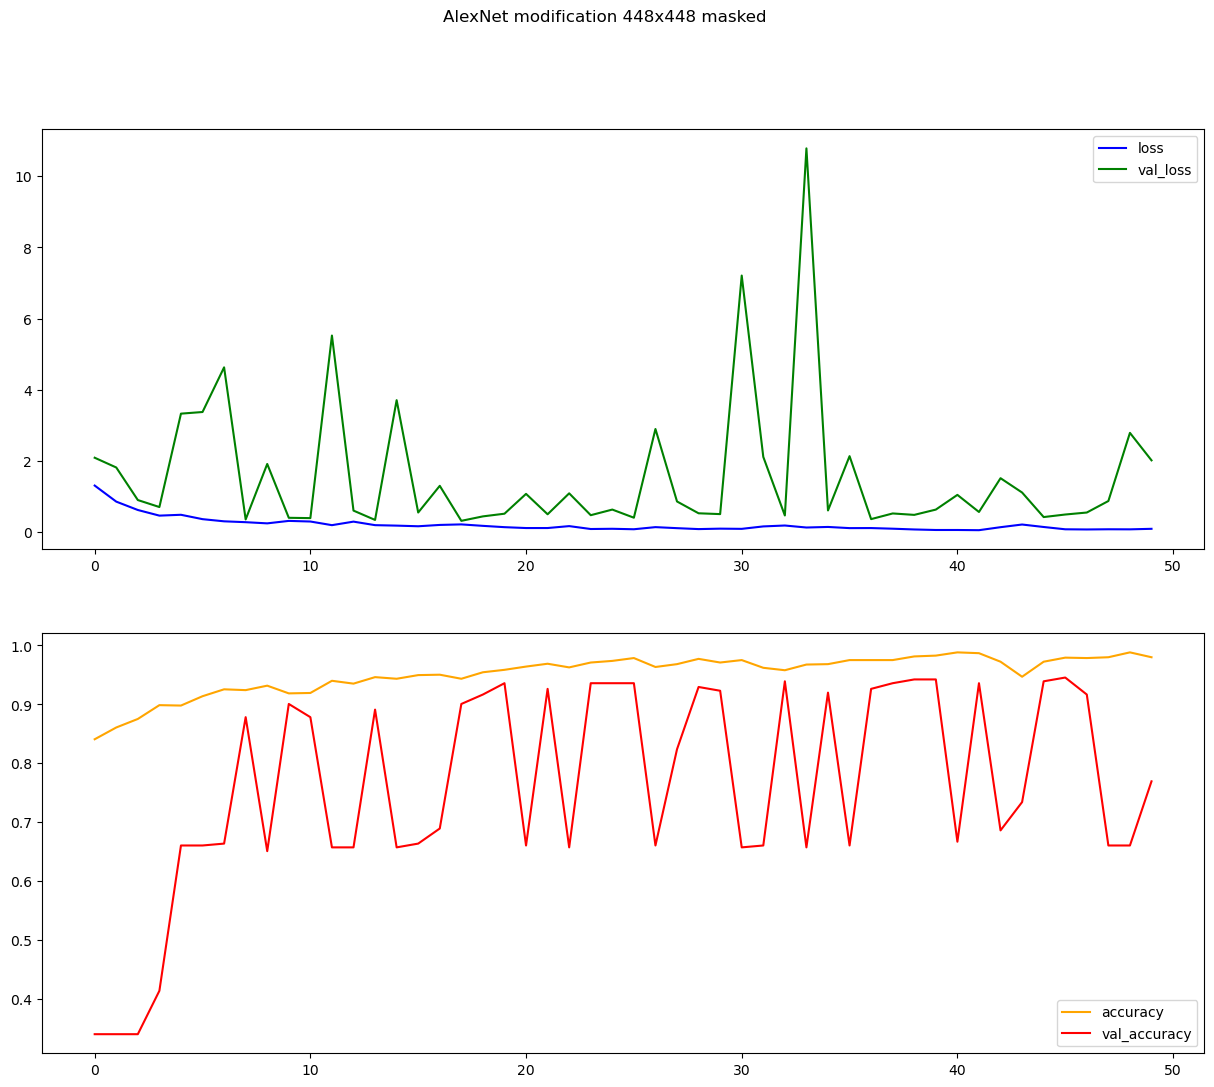

In [18]:
hist = AlexNet_MOD_448_masked.fit(train_dataset_masked, epochs=EPOCHS, validation_data=validation_dataset_masked,
                                  batch_size=BATCH_SIZE)

results = AlexNet_MOD_448_masked.evaluate(test_dataset_masked, verbose=1)

fig = plt.figure(figsize=(15,12))
fig.suptitle('AlexNet modification 448x448 masked')

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(hist.history['loss'], color='blue', label='loss', )
ax1.plot(hist.history['val_loss'], color='green', label='val_loss')
ax1.legend(loc="upper right")
ax2.plot(hist.history['accuracy'], color='orange', label='accuracy')
ax2.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
ax2.legend(loc="lower right")
plt.show()

Epoch 1/50


2022-10-13 20:15:49.926912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - ETA: 0s - loss: 1.3774 - accuracy: 0.8062

2022-10-13 20:16:10.787085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - 23s 219ms/step - loss: 1.3774 - accuracy: 0.8062 - val_loss: 2.4455 - val_accuracy: 0.3397
Epoch 2/50
91/91 [==============================] - 22s 217ms/step - loss: 1.0442 - accuracy: 0.8076 - val_loss: 2.5563 - val_accuracy: 0.3397
Epoch 3/50
91/91 [==============================] - 22s 217ms/step - loss: 0.6997 - accuracy: 0.8269 - val_loss: 1.1030 - val_accuracy: 0.6603
Epoch 4/50
91/91 [==============================] - 22s 216ms/step - loss: 0.6107 - accuracy: 0.8317 - val_loss: 1.0243 - val_accuracy: 0.6603
Epoch 5/50
91/91 [==============================] - 22s 216ms/step - loss: 0.4949 - accuracy: 0.8476 - val_loss: 0.9175 - val_accuracy: 0.6603
Epoch 6/50
91/91 [==============================] - 22s 217ms/step - loss: 0.4336 - accuracy: 0.8579 - val_loss: 2.7715 - val_accuracy: 0.6603
Epoch 7/50
91/91 [==============================] - 22s 217ms/step - loss: 0.4786 - accuracy: 0.8621 - val_loss: 3.0835 - val_accuracy: 0.6603
Epoch 8/50

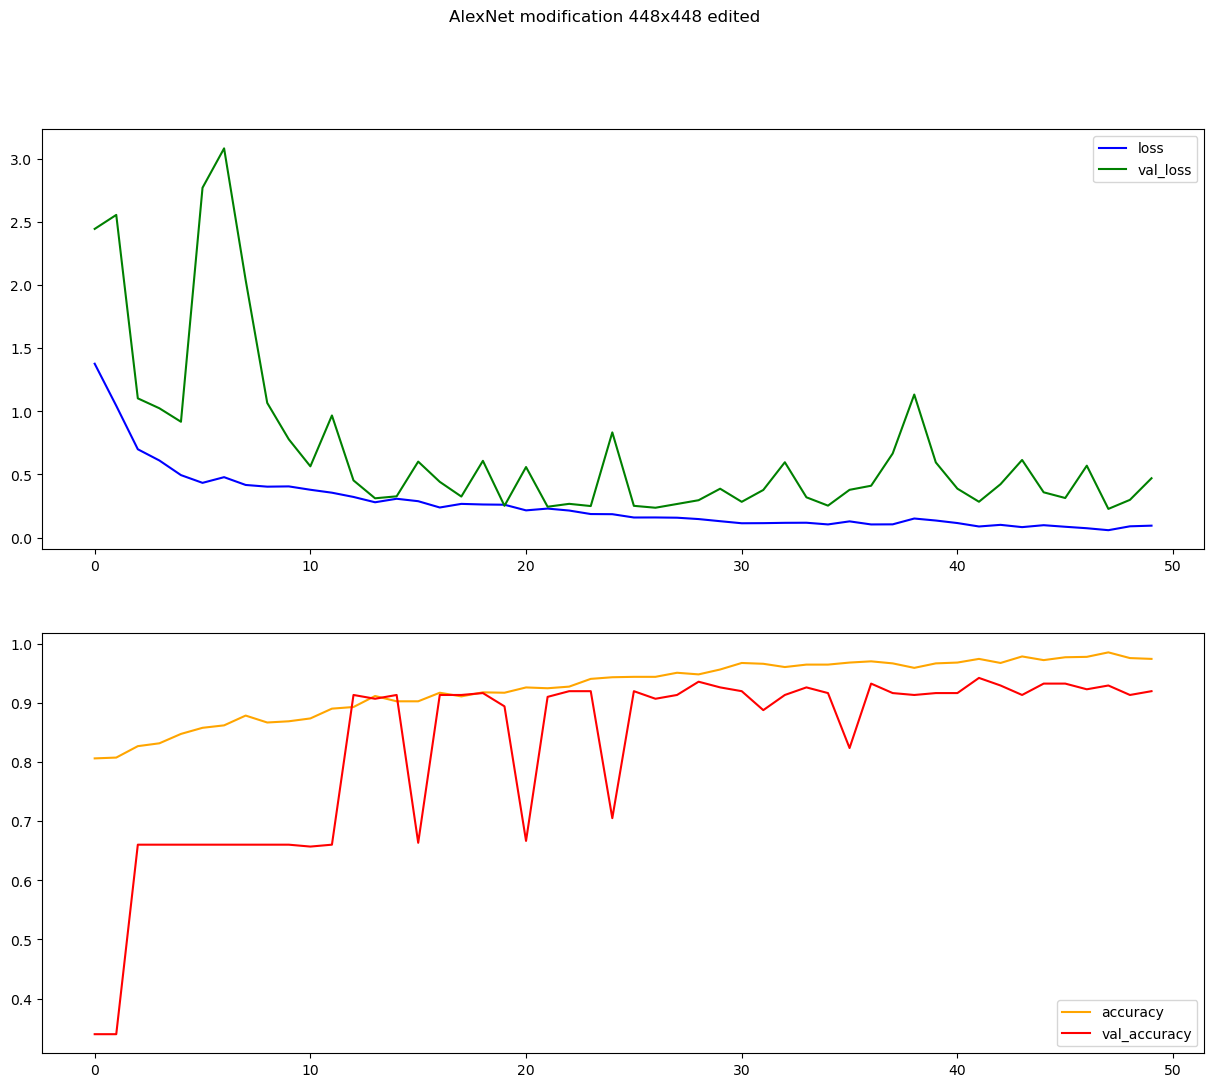

In [19]:
hist = AlexNet_MOD_448_edited.fit(train_dataset_edited, epochs=EPOCHS, validation_data=validation_dataset_edited,
                                  batch_size=BATCH_SIZE)

results = AlexNet_MOD_448_edited.evaluate(test_dataset_masked, verbose=1)

fig = plt.figure(figsize=(15,12))
fig.suptitle('AlexNet modification 448x448 edited')

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(hist.history['loss'], color='blue', label='loss', )
ax1.plot(hist.history['val_loss'], color='green', label='val_loss')
ax1.legend(loc="upper right")
ax2.plot(hist.history['accuracy'], color='orange', label='accuracy')
ax2.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
ax2.legend(loc="lower right")
plt.show()